In [1]:
# 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [3]:
# 2: Load training data
def load_data(path):
    df = pd.read_csv(path)
    return df

train_df = load_data("C:\\Users\\KavishkeSamarasena\\Desktop\\My Files\\ICBT\\Assignments\\CI\\train.csv")


Shape: (15000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB
None
                 id    CustomerId   CreditScore           Age       

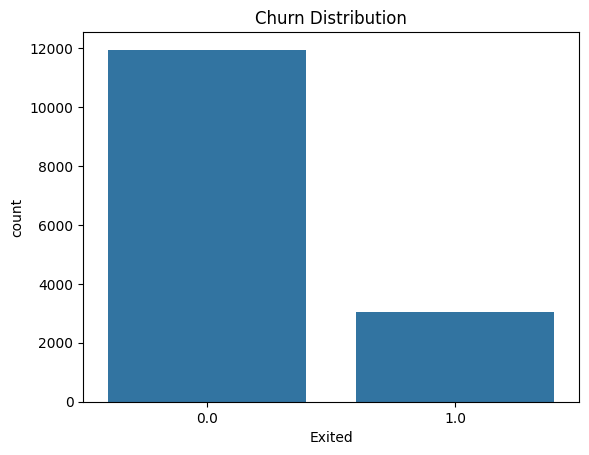

In [4]:
# 3: Basic exploration
def explore_data(df):
    print("Shape:", df.shape)
    print(df.info())
    print(df.describe())
    print("Missing values:\n", df.isnull().sum())
    sns.countplot(x='Exited', data=df)
    plt.title('Churn Distribution')
    plt.show()

explore_data(train_df)

In [5]:
# 4: Preprocessing
def preprocess_data(df, is_train=True):
    df = df.copy()
    if is_train:
        df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
    else:
        df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True, errors='ignore')

    df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

    return df

df_model = preprocess_data(train_df)

X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

In [6]:
# 5: Split and scale
def split_and_scale(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train, X_val, y_train, y_val, X_train_scaled, X_val_scaled, scaler

X_train, X_val, y_train, y_val, X_train_scaled, X_val_scaled, scaler = split_and_scale(X, y)

In [7]:
# 6: Evaluation function
def evaluate_model(model, X_val, y_val, name):
    y_pred = model.predict(X_val)
    print(f"\n📊 {name} - Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print(f"📊 {name} - Classification Report:\n", classification_report(y_val, y_pred))
    accuracy = accuracy_score(y_val, y_pred)
    print(f"📈 {name} - Accuracy: {accuracy:.4f}")
    return accuracy

In [8]:
# 7: Train models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
acc_dt = evaluate_model(dt_model, X_val_scaled, y_val, "Decision Tree")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
acc_rf = evaluate_model(rf_model, X_val_scaled, y_val, "Random Forest")

# SVM
svm_model = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
acc_svm = evaluate_model(svm_model, X_val_scaled, y_val, "SVM")

# ANN
ann_model = Sequential([
    Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)

y_pred_ann = (ann_model.predict(X_val_scaled) > 0.5).astype(int)
acc_ann = accuracy_score(y_val, y_pred_ann)
print(f"\n📊 ANN - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_ann))
print("📊 ANN - Classification Report:\n", classification_report(y_val, y_pred_ann))
print(f"📈 ANN - Accuracy: {acc_ann:.4f}")


📊 Decision Tree - Confusion Matrix:
 [[2157  231]
 [ 217  395]]
📊 Decision Tree - Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      2388
         1.0       0.63      0.65      0.64       612

    accuracy                           0.85      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.85      0.85      0.85      3000

📈 Decision Tree - Accuracy: 0.8507

📊 Random Forest - Confusion Matrix:
 [[2284  104]
 [ 225  387]]
📊 Random Forest - Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2388
         1.0       0.79      0.63      0.70       612

    accuracy                           0.89      3000
   macro avg       0.85      0.79      0.82      3000
weighted avg       0.89      0.89      0.89      3000

📈 Random Forest - Accuracy: 0.8903

📊 SVM - Confusion Matrix:
 [[2296   92]
 [ 232  380]]
📊 SVM -

D:\ICBT\Anaconda\envs\KaggleCompetition\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

📊 ANN - Confusion Matrix:
 [[2277  111]
 [ 216  396]]
📊 ANN - Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2388
         1.0       0.78      0.65      0.71       612

    accuracy                           0.89      3000
   macro avg       0.85      0.80      0.82      3000
weighted avg       0.89      0.89      0.89      3000

📈 ANN - Accuracy: 0.8910


In [9]:
# 8: Save the best model
model_scores = {
    'Decision Tree': acc_dt,
    'Random Forest': acc_rf,
    'SVM': acc_svm,
    'ANN': acc_ann
}
best_model_name = max(model_scores, key=model_scores.get)
print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {model_scores[best_model_name]:.4f}")

if best_model_name == "Random Forest":
    joblib.dump(rf_model, 'churn_model.pkl')
elif best_model_name == "Decision Tree":
    joblib.dump(dt_model, 'churn_model.pkl')
elif best_model_name == "SVM":
    joblib.dump(svm_model, 'churn_model.pkl')
else:
    ann_model.save('churn_model.h5')

joblib.dump(scaler, 'scaler.pkl')
print("✅ Saved best model and scaler.")



🏆 Best Model: SVM with Accuracy: 0.8920
✅ Saved best model and scaler.


In [10]:
# 9: Predict on test data
def prepare_test_data(test_path, X_train_columns, scaler):
    test_df = pd.read_csv(test_path)
    customer_ids = test_df['CustomerId']
    test_df = preprocess_data(test_df, is_train=False)

    for col in X_train_columns:
        if col not in test_df.columns:
            test_df[col] = 0
    test_df = test_df[X_train_columns]
    test_scaled = scaler.transform(test_df)
    return customer_ids, test_scaled

customer_ids, test_scaled = prepare_test_data(
    "C:\\Users\\KavishkeSamarasena\\Desktop\\My Files\\ICBT\\Assignments\\CI\\test.csv", 
    X.columns, scaler
)

# Predict
if best_model_name == "ANN":
    test_preds = (ann_model.predict(test_scaled) > 0.5).astype(int)
else:
    test_preds = eval(f"{best_model_name.lower().replace(' ', '_')}_model").predict(test_scaled)

# Save submission
submission = pd.DataFrame({
    'CustomerId': customer_ids,
    'Exited': test_preds.flatten()
})
submission.to_csv("submission.csv", index=False)
print("📤 Submission file saved.")


📤 Submission file saved.


In [11]:
print(X_train.shape[1])         # in notebook


11


NameError: name 'input_data' is not defined